In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 0

Скачаем данные

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

### 1

Постройте гистограмму медианного дохода (MedInc) и оцените распределение это величины. Что вы можете сказать?

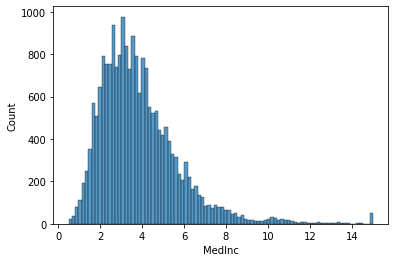

In [3]:
sns.histplot(df.MedInc)
plt.show()

Видим, что распределение не симметрично (асимметрично), значения только положительные, а медиана ближе к 4, чем к 6 (6 уж точно далеко от середины распределения).

### 2

Рассмотрим признаки медианного дохода (MedInc) и среднего возраста домов (HouseAge). Постройте их распределения и попробуйте сразу предположить, у какого из признаков будет сильнее отличаться медиана от среднего. Важно учесть, что возраст домов измеряется в больших величинах, поэтому условно будем делить их на 5 (например, вычисленную разницу между медианой и средним разделим на 5).

А теперь вычислите эти величины вручную или с использованием numpy. Где разница оказалась больше с учётом деления на 5 возраста домов?

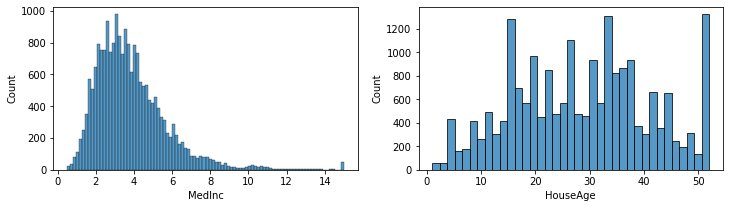

In [4]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.histplot(df.MedInc)

plt.subplot(1, 2, 2)
sns.histplot(df.HouseAge)

plt.show()

In [5]:
np.abs(df.MedInc.mean() - df.MedInc.median())

0.3358710029069769

In [6]:
np.abs(df.HouseAge.mean() - df.HouseAge.median()) / 5

0.07210271317829467

У MedInc разница оказалась больше. Это можно было предположить и по тому, что MedInc распределён ассиметрично и имеет правый хвост. В таких случаях обычно медиана и среднее начинают различаться.

### 3

Кстати, в отдельную переменную мы сохранили наш таргет — медианную цену на дома в этой области. Давайте построим гистограмму и оценим, насколько широко она распределена.

Посчитайте интерквартильный размах этой случайной величины. Напомним, что это расстояние между 25-й и 75-й перцентилями.

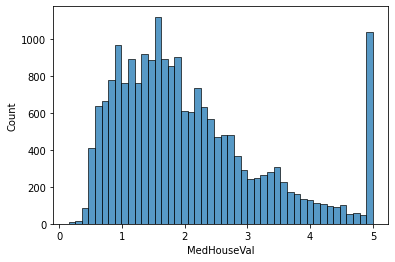

In [7]:
sns.histplot(target)
plt.show()

Посчитаем и интерквартильный размах, а для этого посчитаем 0.25 и 0.75 квантили.

In [8]:
q25, q75 = np.quantile(target, [0.25, 0.75])
q75 - q25

1.4512499999999997

### 4

Если вы помните, необязательно считать вручную средние значения и прочие статистики по каждому признаку. Можно использовать метод describe для dataframe.

Попробуйте с помощью describe вычислить все статистики.

У какого из признаков получилось наибольшее значение медианы? Напомним, что медиана — это 50-я перцентиль.

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Можно увидеть, что медиана Population примерно равна 1166, что больше медиан других признаков. Медиана в этой табличке находится в строке "50%".

### 5

Настало время исследовать взаимосвязи признаков с целевой переменной и друг другом.

Посчитай корреляцию Пирсона с каждым из признаков. У какого из признаков она будет наибольшей по абсолютному значению (то есть без учёта знака)?



In [10]:
from scipy.stats import pearsonr

for col in df.columns:
    print(col, pearsonr(df[col], target)[0])

MedInc 0.6880752079585437
HouseAge 0.10562341249321017
AveRooms 0.1519482897414573
AveBedrms -0.046700512969486616
Population -0.02464967888889466
AveOccup -0.02373741295613426
Latitude -0.14416027687466076
Longitude -0.04596661511797775


Можно было сразу взять модуль и сделать argmax, но тут немного колонок, на глаз видно, что это MedInc.

### 6

Вы могли заметить, что мы пока никак не нормировали наши признаки. Если мы их стандартизируем (то есть вычтем среднее и разделим на среднеквадратичное отклонение), то как поменяются значения корреляций Пирсона, Спирмена и Кендалла?

Попробуйте сначала догадаться по тому, как устроены и вычисляются эти корреляции, а уже потом проверьте это на нашем датасете.

Какие из корреляций поменяют свои значения после нормализации?

**Решение**

Можно сразу догадаться, что для корреляции Спирмена и Кендалла ничего не поменяются — они строятся на рангах. Монотонные преобразования (например, нормализация) никак не влияют на ранги (мы просто меняем одинакого в несколько раз абсолютные значения и вычитаем из них одни и те же числа).

С корреляцией Пирсона сложнее. Можно вглядываться в формулу и размышлять, а можно просто проверить:

In [11]:
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

for col in df.columns:
    print(col, pearsonr(normalize(df[col]), normalize(target))[0])

MedInc 0.6880752079585436
HouseAge 0.10562341249321014
AveRooms 0.15194828974145722
AveBedrms -0.04670051296948663
Population -0.024649678888894695
AveOccup -0.02373741295613426
Latitude -0.14416027687466093
Longitude -0.04596661511797784


Получается, что и корреляция Пирсона не меняется. 

### 7

Давайте посмотрим внимательнее на признак «среднее число комнат» (AveRooms). Интуитивно кажется, что эта величина должна быть связана с целевой переменной, так как обычно чем больше комнат, тем дороже жильё.

Посчитайте его корреляции (все три) с целевой переменной. Какая из корреляций имеет наименьшее значение?

In [12]:
from scipy.stats import pearsonr, spearmanr, kendalltau

print('Пирсон:  ', pearsonr(df.AveRooms, target)[0])
print('Спирман: ', spearmanr(df.AveRooms, target)[0])
print('Кендалл: ', kendalltau(df.AveRooms, target)[0])

Пирсон:   0.1519482897414573
Спирман:  0.26336668772954447
Кендалл:  0.17917481650845044


Корреляция Пирсона имеет наименьшее значение.

### 8

Почему же так вышло? Неужели среднее количество комнат плохо коррелирует с ценой?

Постройте гистограмму для среднего количества комнат. Что вы на ней видите?

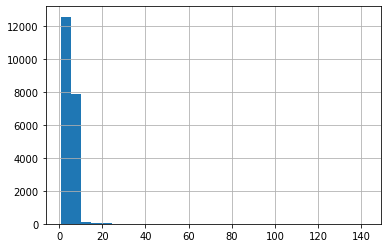

In [13]:
df.AveRooms.hist(bins=30)
plt.show()

Сразу можно заметить, что распределение не похоже на нормальное и ассимтерично.

Можно заметить, что встречаются большие значения, хоть и редко. Можно предположить, чтоэ то выбросы. В том числе те, где более 100 комнат.

Этих столбиков на гистограмме не видно, но так как мы не задавали, какие значения должны быть отражены на гистограмме, то библиотека их отобразили, потому что там есть какие-то значения. Для проверки можно явно их поискать.

### 9

Давайте избавимся от выбросов для более устойчивой оценки корреляции.

Удалите по 2.5% самых больших и малых значений по признаку «среднее число комнат» (AveRooms). Пересчитайте значение коэффициентов корреляции.

Какой из них наиболее сильно поменялся после удаления выбросов? Так мы поняли, какой из видов не устойчив к выбросам.

**Решение**

Найдём пороги отсечки с каждого конца и обрежем выборку по ним

In [14]:
thr_l, thr_r = np.percentile(df.AveRooms, [2.5, 97.5])

tdf = df[(df.AveRooms > thr_l) & (df.AveRooms < thr_r)]
ttarget = target[(df.AveRooms > thr_l) & (df.AveRooms < thr_r)]

Посчитаем снова корреляции

In [15]:
from scipy.stats import pearsonr, spearmanr, kendalltau
print('Пирсон:  ', pearsonr(tdf.AveRooms, ttarget)[0])
print('Спирман: ', spearmanr(tdf.AveRooms, ttarget)[0])
print('Кендалл: ', kendalltau(tdf.AveRooms, ttarget)[0])

Пирсон:   0.32775904644937304
Спирман:  0.2747934656924966
Кендалл:  0.1862786837002656


Видим, что корреляция Пирсона изменилось сильно (зависит от выбросов), а две других почти не поменялись (более устойчивы, так как опираются на ранги).

### 10

Некоторые методы машинного обучения чувствительны к скоррелированным признакам. Также поиск скоррелированных признаков — один из способов отбора признаков.

Давайте проанализируем корреляцию между признаками, чтобы выявить скоррелированные группы признаков.

Можно посчитать попарные корреляции, но это не очень удобно и не позволяет находить группы (а не только пары). Воспользуйтесь seaborn.heatmap и визуализируйте попарные корреляции Пирсона между признаками, посчитанные с помощью метода corr у dataframe. Будьте аккуратнее с тем, в каких диапазонах значений считается корреляция и какие настройки у heatmap.

Внимание, используйте датасет до фильтрации из предыдущего задания.

Какие пары признаков выделились как наиболее скоррелированные? Знак корреляции не важен.

**Решение**

Построим heatmap с попарными корреляциями Пирсона. Важно указать диапазон измерений, чтобы цвета были более информативны.

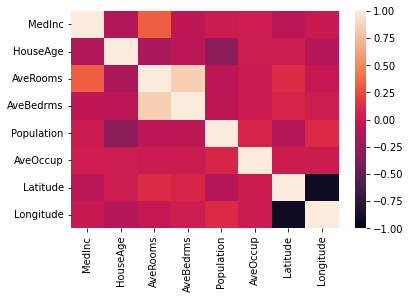

In [16]:
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1)
plt.show()

Если рисовать в стандартных цветах, то можно увидеть, что у широты с долготой корреляция близка к -1, а у среднего количества комнат и спален близка к 1. Другие же близки к 0.